<a href="https://colab.research.google.com/github/suryapratapsinh/LGMVIP--DataScience-Task-3/blob/main/task_3_music_recomanded_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suryapratapsinh Thakor**

# **Data Science Inter at LetsGrowMore**

# **Task-3  music recomanded system**

# google drive connect with colab for importing dataset

In [41]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# load dataset

In [43]:
members=pd.read_csv("/content/drive/MyDrive/ml_dataset/members.csv.csv")
songs=pd.read_csv("/content/drive/MyDrive/ml_dataset/songs (1).csv")
train=pd.read_csv("/content/drive/MyDrive/ml_dataset/train (1).csv")

In [44]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


# merge columns based on same entity

In [45]:

train=train.merge(members,on="msno",how="left")
train=train.merge(songs,on="song_id",how="left")

# remove unused columns

In [46]:
train.drop(['registration_init_time','registered_via','bd','gender','lyricist'],axis=1,inplace=True)


In [47]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [48]:
train.columns


Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'expiration_date', 'song_length',
       'genre_ids', 'artist_name', 'composer', 'language'],
      dtype='object')

In [49]:
for col in train.select_dtypes(include=['object']).columns:
    train[col]=train[col].astype('category')
for col in train.select_dtypes(include=['category']).columns:
    train[col]=train[col].cat.codes

In [50]:
train.fillna(-1)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,expiration_date,song_length,genre_ids,artist_name,composer,language
0,8158,74679,1,7,6,1,1,20171005,206471.0,285,3277,14581,52.0
1,17259,223479,3,8,4,1,13,20170911,284584.0,90,31960,-1,52.0
2,17259,120758,3,8,4,1,13,20170911,225396.0,90,21372,45057,52.0
3,17259,23707,3,8,4,1,13,20170911,255512.0,6,27439,36700,-1.0
4,8158,33308,1,7,6,1,1,20171005,187802.0,2,4472,8485,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,4211,187659,3,8,4,1,4,20170930,267958.0,90,8749,3515,52.0
7377414,18266,354712,6,15,8,0,1,20171006,227404.0,344,24013,58948,52.0
7377415,18266,51546,6,15,8,1,1,20171006,258298.0,344,34936,67637,3.0
7377416,1216,102430,0,5,6,1,5,20170918,524146.0,219,4380,-1,52.0


In [51]:
y=train['target']
train = train.drop(['target'],axis=1)

# checking null values

In [52]:
missing_values_count = train.isnull().sum()
missing_values_count

msno                    0
song_id                 0
source_system_tab       0
source_screen_name      0
source_type             0
city                    0
expiration_date         0
song_length           114
genre_ids               0
artist_name             0
composer                0
language              150
dtype: int64

## fill null values with mean of the column

In [53]:
train['song_length']=train['song_length'].fillna(train['song_length'].mean())
train['language']=train['language'].fillna(train['language'].mean())

In [54]:
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
city                  0
expiration_date       0
song_length           0
genre_ids             0
artist_name           0
composer              0
language              0
dtype: int64

# Train test spliting data

In [55]:

x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=0)

# Random forest classifier

In [56]:
cl=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
cl.fit(x_train,y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [57]:
pred=cl.predict(x_test)

In [58]:
import sklearn
sklearn.metrics.accuracy_score(y_test,pred)

0.649085994832882

<Axes: >

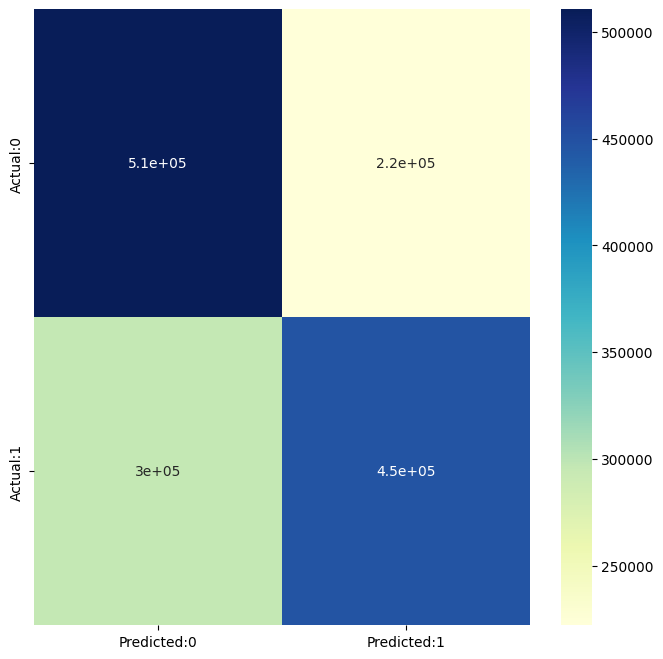

In [64]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,pred)
c_m=pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,8))
sns.heatmap(c_m,annot=True,cmap='YlGnBu')

# checking for confusion matrix

In [69]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [70]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.649085994832882 
 The Missclassification = 1-Accuracy =  0.350914005167118 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.6020475748152336 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.696777742290358 
 Positive Predictive value = TP/(TP+FP) =  0.6681132875991969 
 Negative predictive Value = TN/(TN+FN) =  0.6332861105459814 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.985499281493179 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.5711325161975875


In [71]:
y_pred_prob=cl.predict_proba(x_test)[:,:]
y_pred_prob_d=pd.DataFrame(data=y_pred_prob,columns=['Prob of not listening repeatedly (0)','Prob of listening repeatedly (1)'])
y_pred_prob_d.head()

,Prob of not listening repeatedly (0),Prob of listening repeatedly (1)
0,0.1,0.9
1,0.4,0.6
2,0.3,0.7
3,0.6,0.4
4,0.3,0.7


# ROC  curve

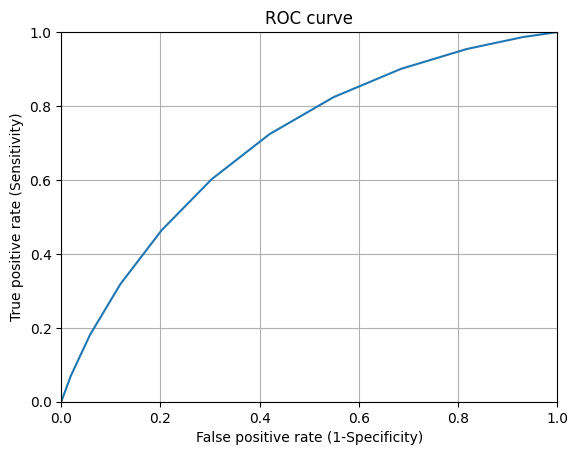

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, cl.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# checking accuracy

In [73]:
sklearn.metrics.roc_auc_score(y_test,cl.predict_proba(x_test)[:,1])


0.7032721724535691